In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
from sklearn.linear_model import LinearRegression

In [8]:
df = pd.read_csv("ML course notebooks/08-Linear-Regression-Models/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


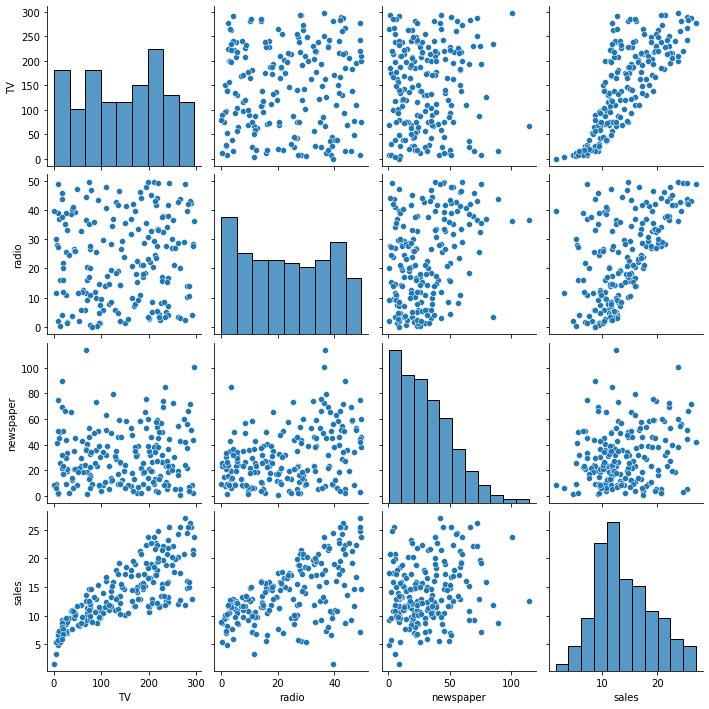

In [9]:
# Checking whether the values have a linear relation to each other:
sns.pairplot(df)

In [11]:
# Our model's X-value (the features we will give to the model)
X = df[['TV', 'radio', 'newspaper']]
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
# Our models y-value (the feature(s) we want the model to predict) - y depends on X:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
test_predictions = model.predict(X_test)
print(test_predictions)

[15.74131332 19.61062568 11.44888935 17.00819787  9.17285676  7.01248287
 20.28992463 17.29953992  9.77584467 19.22194224 12.40503154 13.89234998
 13.72541098 21.28794031 18.42456638  9.98198406 15.55228966  7.68913693
  7.55614992 20.40311209  7.79215204 18.24214098 24.68631904 22.82199068
  7.97962085 12.65207264 21.46925937  8.05228573 12.42315981 12.50719678
 10.77757812 19.24460093 10.070269    6.70779999 17.31492147  7.76764327
  9.25393336  8.27834697 10.58105585 10.63591128 13.01002595  9.77192057
 10.21469861  8.04572042 11.5671075  10.08368001  8.99806574 16.25388914
 13.23942315 20.81493419 12.49727439 13.96615898 17.56285075 11.14537013
 12.56261468  5.50870279 23.29465134 12.62409688 18.77399978 15.18785675]


In [24]:
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"{MAE=} & {RMSE=}")

MAE=1.213745773614481 & RMSE=1.5161519375993882


In [25]:
# Retraining model on FULL data (only if we're satisfied with test data performance):
y_hat = model.predict(X)

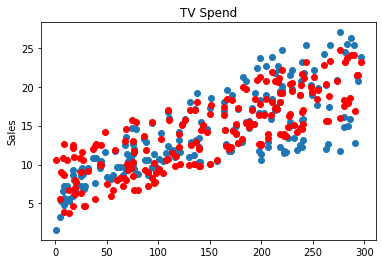

In [35]:
fig, axes = plt.subplots()

axes.set_ylabel("Sales")
axes.set_title("TV Spend")
axes.plot(df['TV'], df['sales'], 'o')
axes.plot(df['TV'], y_hat, 'o', color='red')

Text(0, 0.5, 'Sales')

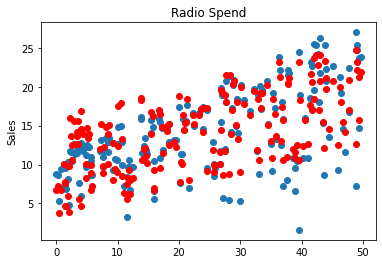

In [33]:
fig, axes = plt.subplots()

axes.set_title("Radio Spend")
axes.set_ylabel("Sales")
axes.plot(df['radio'], df['sales'], 'o')
axes.plot(df['radio'], y_hat, 'o', color='red')

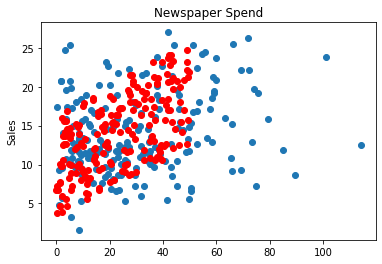

In [34]:
fig, axes = plt.subplots()

axes.set_title("Newspaper Spend")
axes.set_ylabel("Sales")
axes.plot(df['newspaper'], df['sales'], 'o')
axes.plot(df['radio'], y_hat, 'o', color='red')

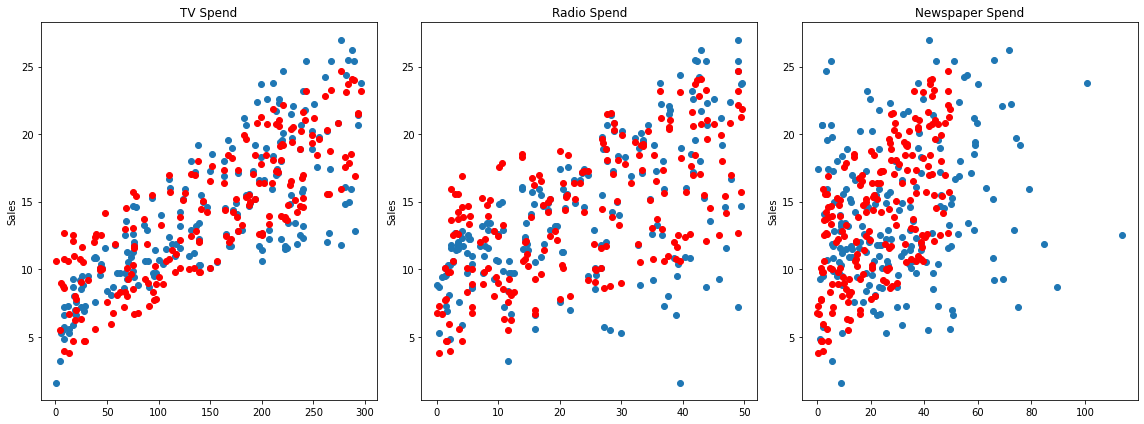

In [37]:
# OR all three together:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['radio'], y_hat, 'o', color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [38]:
# Coefficients:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [39]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df # Easier to see the coefficients now

,Coefficient
TV,0.044696
radio,0.187566
newspaper,-0.000323


In [40]:
# Persisting a model:
from joblib import dump, load

In [41]:
dump(model, 'sales_model.joblib')

['sales_model.joblib']

In [42]:
loaded_model = load('sales_model.joblib')
loaded_model.predict([[149, 22, 12]])

C:\Users\Hum\PycharmProjects\ml_course\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.93380216])